In [3]:
#librerías para gráficar
import numpy as np 
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats
# LIBRERÍA DE LA QUE UTILIZAREMOS PARA LA REGRESIÓN LINEAL
from sklearn.linear_model import LinearRegression
#PARA OBSERVAR EL CALENDARIO
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

import os
#librería que vimos que nos ayuda 
import warnings
warnings.filterwarnings("ignore")

#librería para graficar
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

### File Descriptions and Data Field Information

### train.csv
The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.

##### store_nbr
identifies the store at which the products are sold.

##### family 
identifies the type of product sold.

##### sales 
gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

##### onpromotion
gives the total number of items in a product family that were being promoted at a store at a given date.

### test.csv
The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
The dates in the test data are for the 15 days after the last date in the training data.

### sample_submission.csv
A sample submission file in the correct format.

### stores.csv
Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.

### oil.csv
Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

### holidays_events.csv
Holidays and Events, with metadata
NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

### Additional Notes
Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data


In [5]:
holidays_events = pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")
sample_submission = pd.read_csv("sample_submission.csv") 
stores = pd.read_csv("stores.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
transactions = pd.read_csv("transactions.csv")

# VISUALISATION

#### HOLIDAYS

In [6]:
holidays_events

date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

In [7]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [8]:
holidays_events.describe()

date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338

<AxesSubplot:>

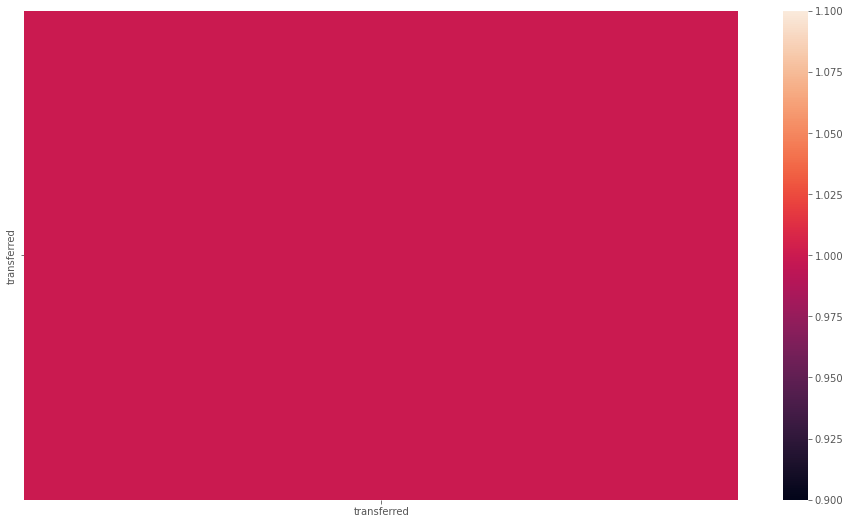

In [9]:
sns.heatmap(holidays_events.corr())

#### oil

In [10]:
oil

date  dcoilwtico
0     2013-01-01         NaN
1     2013-01-02       93.14
2     2013-01-03       92.97
3     2013-01-04       93.12
4     2013-01-07       93.20
...          ...         ...
1213  2017-08-25       47.65
1214  2017-08-28       46.40
1215  2017-08-29       46.46
1216  2017-08-30       45.96
1217  2017-08-31       47.26

[1218 rows x 2 columns]

In [11]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [12]:
oil.describe()

dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000

In [13]:
oil.hist()
plt.show()

<AxesSubplot:>

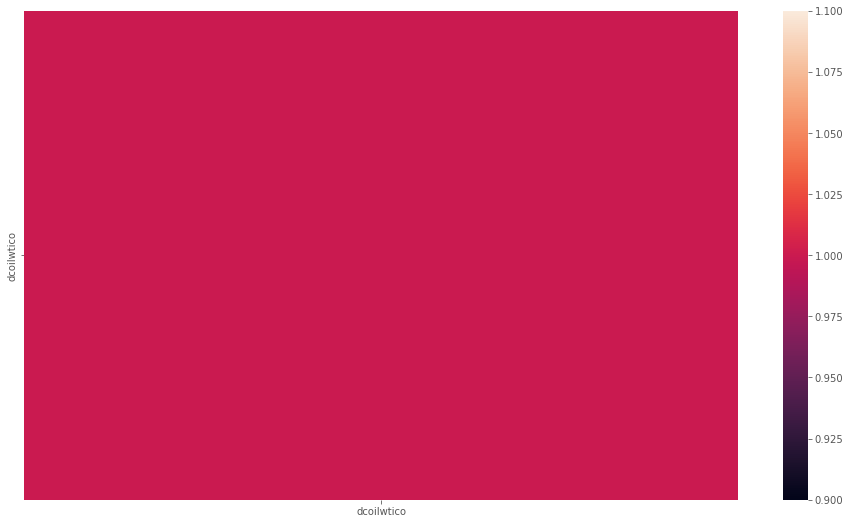

In [14]:
sns.heatmap(oil.corr())

#### sample

In [16]:
sample_submission

id  sales
0      3000888    0.0
1      3000889    0.0
2      3000890    0.0
3      3000891    0.0
4      3000892    0.0
...        ...    ...
28507  3029395    0.0
28508  3029396    0.0
28509  3029397    0.0
28510  3029398    0.0
28511  3029399    0.0

[28512 rows x 2 columns]

In [17]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [18]:
sample_submission.describe()

id    sales
count  2.851200e+04  28512.0
mean   3.015144e+06      0.0
std    8.230850e+03      0.0
min    3.000888e+06      0.0
25%    3.008016e+06      0.0
50%    3.015144e+06      0.0
75%    3.022271e+06      0.0
max    3.029399e+06      0.0

In [19]:
sample_submission.hist()
plt.show()

<AxesSubplot:>

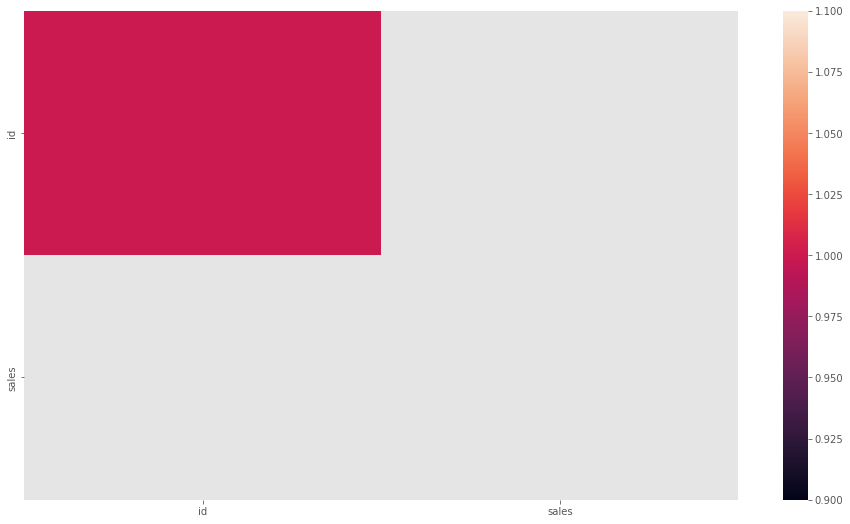

In [20]:
sns.heatmap(sample_submission.corr())

#### stores

In [21]:
stores

store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D        8
3           4          Quito                       Pichincha    D        9
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
5           6          Quito                       Pichincha    D       13
6           7          Quito                       Pichincha    D        8
7           8          Quito                       Pichincha    D        8
8           9          Quito                       Pichincha    B        6
9          10          Quito                       Pichincha    C       15
10         11        Cayambe                       Pichincha    B        6
11         12      Latacunga                        Cotopaxi    C       15
12         13      Latacunga                        Cotopaxi    C       15
13         14       Riobamba                      Chimborazo    C        7
14         15         Ibarra                        Imbabura    C       15
15         16  Santo Domingo  Santo Domingo de los Tsachilas    C        3
16         17          Quito                       Pichincha    C       12
17         18          Quito                       Pichincha    B       16
18         19       Guaranda                         Bolivar    C       15
19         20          Quito                       Pichincha    B        6
20         21  Santo Domingo  Santo Domingo de los Tsachilas    B        6
21         22           Puyo                         Pastaza    C        7
22         23         Ambato                      Tungurahua    D        9
23         24      Guayaquil                          Guayas    D        1
24         25        Salinas                     Santa Elena    D        1
25         26      Guayaquil                          Guayas    D       10
26         27          Daule                          Guayas    D        1
27         28      Guayaquil                          Guayas    E       10
28         29      Guayaquil                          Guayas    E       10
29         30      Guayaquil                          Guayas    C        3
30         31       Babahoyo                        Los Rios    B       10
31         32      Guayaquil                          Guayas    C        3
32         33        Quevedo                        Los Rios    C        3
33         34      Guayaquil                          Guayas    B        6
34         35         Playas                          Guayas    C        3
35         36       Libertad                          Guayas    E       10
36         37         Cuenca                           Azuay    D        2
37         38           Loja                            Loja    D        4
38         39         Cuenca                           Azuay    B        6
39         40        Machala                          El Oro    C        3
40         41        Machala                          El Oro    D        4
41         42         Cuenca                           Azuay    D        2
42         43     Esmeraldas                      Esmeraldas    E       10
43         44          Quito                       Pichincha    A        5
44         45          Quito                       Pichincha    A       11
45         46          Quito                       Pichincha    A       14
46         47          Quito                       Pichincha    A       14
47         48          Quito                       Pichincha    A       14
48         49          Quito                       Pichincha    A       11
49         50         Ambato                      Tungurahua    A       14
50         51      Guayaquil                          Guayas    A       17
51         52          Manta                          Manabi    A       11
52         53          Manta 

In [22]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [23]:
stores.describe()

store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000

In [24]:
stores.hist()
plt.show()

<AxesSubplot:>

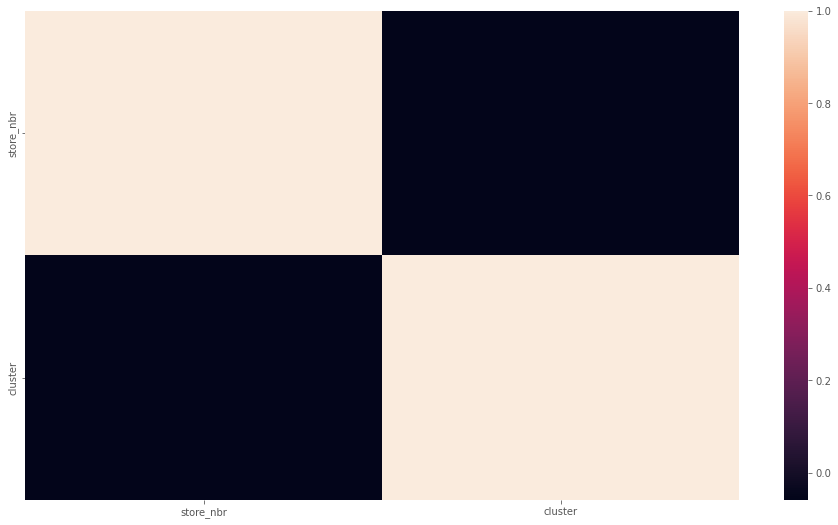

In [25]:
sns.heatmap(stores.corr())

#### test

In [26]:
test

id        date  store_nbr                      family  onpromotion
0      3000888  2017-08-16          1                  AUTOMOTIVE            0
1      3000889  2017-08-16          1                   BABY CARE            0
2      3000890  2017-08-16          1                      BEAUTY            2
3      3000891  2017-08-16          1                   BEVERAGES           20
4      3000892  2017-08-16          1                       BOOKS            0
...        ...         ...        ...                         ...          ...
28507  3029395  2017-08-31          9                     POULTRY            1
28508  3029396  2017-08-31          9              PREPARED FOODS            0
28509  3029397  2017-08-31          9                     PRODUCE            1
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399  2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [28]:
test.describe()

id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.029399e+06     54.000000    646.000000

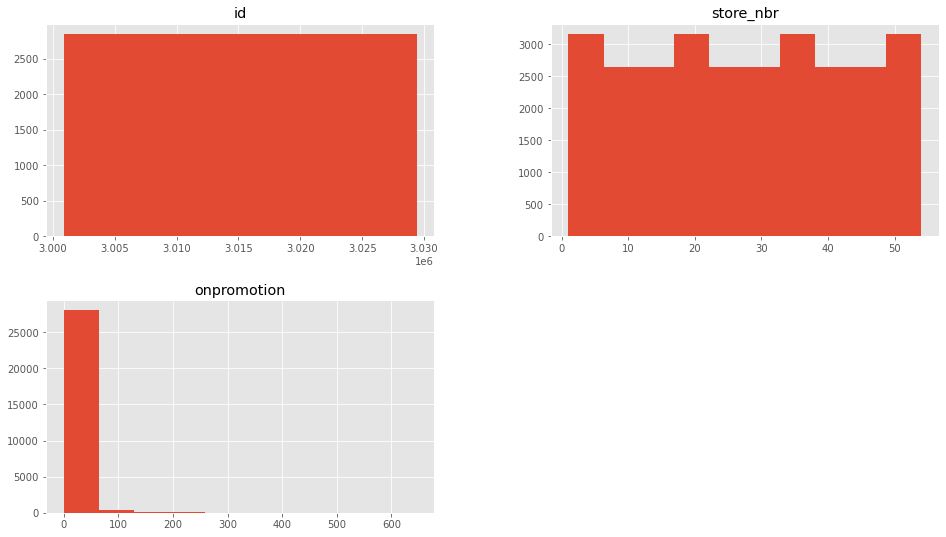

In [29]:
test.hist()
plt.show()

<AxesSubplot:>

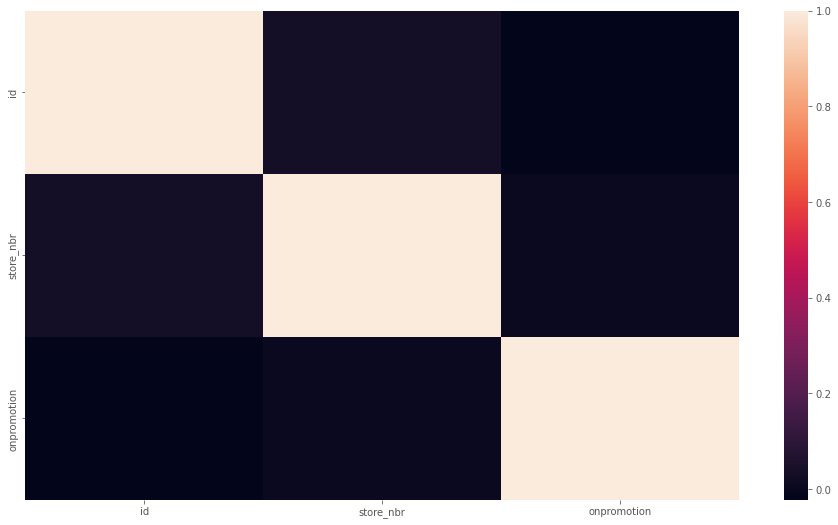

In [30]:
sns.heatmap(test.corr())

#### train

In [31]:
train

id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [33]:
train.describe()

id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

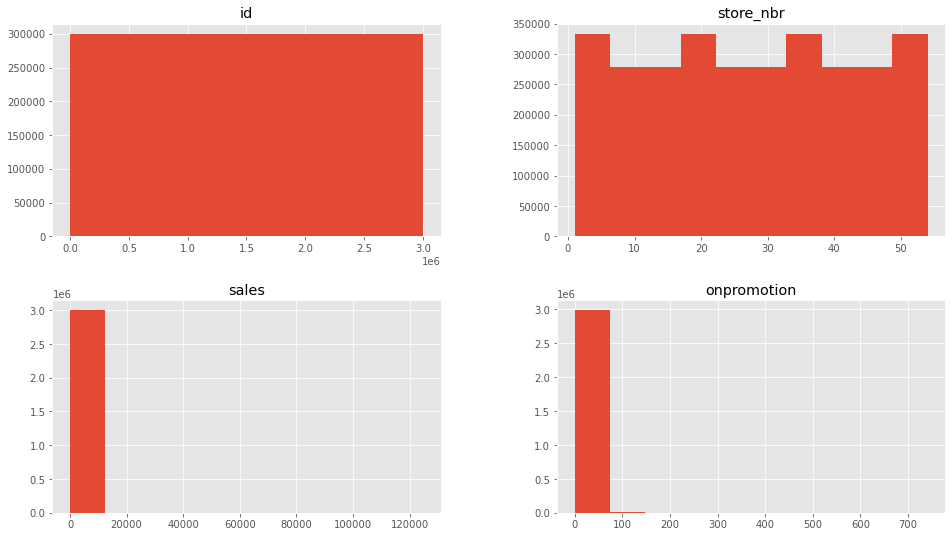

In [34]:
train.hist()
plt.show()

<AxesSubplot:>

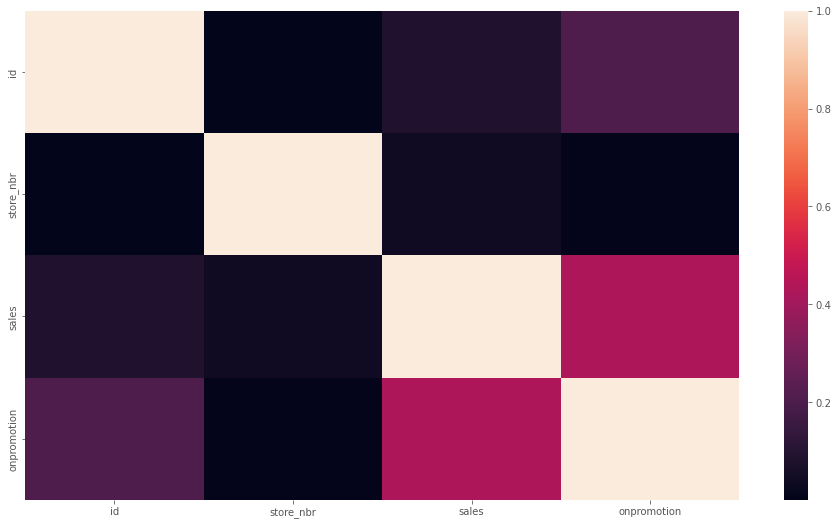

In [35]:
sns.heatmap(train.corr())

#### transactions

In [36]:
transactions

date  store_nbr  transactions
0      2013-01-01         25           770
1      2013-01-02          1          2111
2      2013-01-02          2          2358
3      2013-01-02          3          3487
4      2013-01-02          4          1922
...           ...        ...           ...
83483  2017-08-15         50          2804
83484  2017-08-15         51          1573
83485  2017-08-15         52          2255
83486  2017-08-15         53           932
83487  2017-08-15         54           802

[83488 rows x 3 columns]

In [37]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [38]:
transactions.describe()

store_nbr  transactions
count  83488.000000  83488.000000
mean      26.939237   1694.602158
std       15.608204    963.286644
min        1.000000      5.000000
25%       13.000000   1046.000000
50%       27.000000   1393.000000
75%       40.000000   2079.000000
max       54.000000   8359.000000

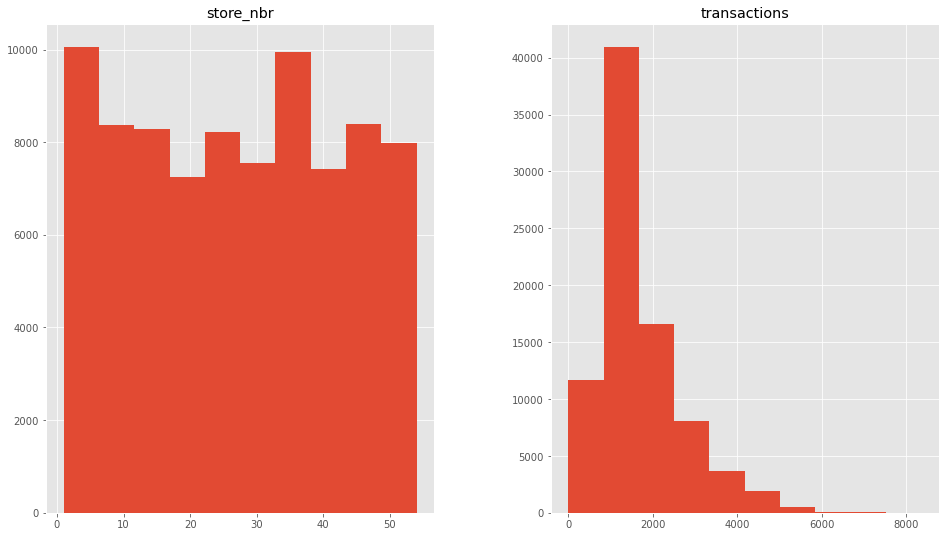

In [39]:
transactions.hist()
plt.show()

In [40]:
sns.heatmap(transactions.corr())

<AxesSubplot:>

## ANALISIS DE DATOS PROFUNDO

Lo que nos interesa es encontrar la mejor epoca para detectar ventas y ver los productos mejor vendidos asi como detectar cuando poner ofertas. 

Vamos a determinar cual es el periodo de tiempo en el que analisaremos nuestros datos

In [41]:
#ANALISANDO FECHAS

In [42]:
fig = plt.figure(figsize=(15,6))
train.groupby(by='date')['sales'].mean().plot()

<AxesSubplot:xlabel='date'>

In [43]:
test['date']

0        2017-08-16
1        2017-08-16
2        2017-08-16
3        2017-08-16
4        2017-08-16
            ...    
28507    2017-08-31
28508    2017-08-31
28509    2017-08-31
28510    2017-08-31
28511    2017-08-31
Name: date, Length: 28512, dtype: object

In [44]:
train['date']

0          2013-01-01
1          2013-01-01
2          2013-01-01
3          2013-01-01
4          2013-01-01
              ...    
3000883    2017-08-15
3000884    2017-08-15
3000885    2017-08-15
3000886    2017-08-15
3000887    2017-08-15
Name: date, Length: 3000888, dtype: object

In [45]:
#TIENDAS

eL CODIGO DE ABAJO, SÍ LO CORRIMOS LO QUE PASA ES QUE AL MOMENTO DE HACERLO SE TARDO ALREDEDOR DE 
DOS HORAS, POR LO QUE POR TIEMPO NO LO CORRIMOS DE NUEVO

In [56]:
fig, axes = plt.subplots(54, 1, figsize=(15, 54*3))

for ax, i in zip(axes.flat, np.arange(0,54,1)):
    sns.lineplot(ax=axes[i], x=train[train.store_nbr==(i+1)].groupby(by='date')['sales'].mean().reset_index().date.values, y=train[train.store_nbr==(i+1)].groupby(by='date')['sales'].mean())
    ax.set_title(f'store_n_{i}') 
    
fig.tight_layout()

In [46]:
stores.groupby(by=['city']).store_nbr.nunique().sort_values(ascending=False)

city
Quito            18
Guayaquil         8
Santo Domingo     3
Cuenca            3
Manta             2
Machala           2
Latacunga         2
Ambato            2
Guaranda          1
Ibarra            1
Esmeraldas        1
Babahoyo          1
Loja              1
El Carmen         1
Daule             1
Playas            1
Puyo              1
Quevedo           1
Cayambe           1
Riobamba          1
Salinas           1
Libertad          1
Name: store_nbr, dtype: int64

In [47]:
## Día Festivo

In [48]:
holidays_events.query("type=='Event'").description.value_counts()

Dia de la Madre                                    5
Mundial de futbol Brasil: Octavos de Final         4
Black Friday                                       3
Cyber Monday                                       3
Mundial de futbol Brasil: Cuartos de Final         2
Mundial de futbol Brasil: Semifinales              2
Terremoto Manabi+21                                1
Terremoto Manabi+14                                1
Terremoto Manabi+15                                1
Terremoto Manabi+16                                1
Terremoto Manabi+17                                1
Terremoto Manabi+18                                1
Terremoto Manabi+19                                1
Terremoto Manabi+20                                1
Terremoto Manabi+24                                1
Terremoto Manabi+22                                1
Terremoto Manabi+23                                1
Terremoto Manabi+12                                1
Terremoto Manabi+25                           

## OBSERVAR LA RELACION ENTRE OIL Y LA ECONOMÍA

In [49]:
ax = oil.set_index('date').plot(figsize = (16, 8))
ax.set_xlabel('Date', fontsize = 'large')
ax.set_ylabel("Crude Oil", fontsize = 'large')

Text(0, 0.5, 'Crude Oil')

Gráfica de oil a lo larfo del tiempo

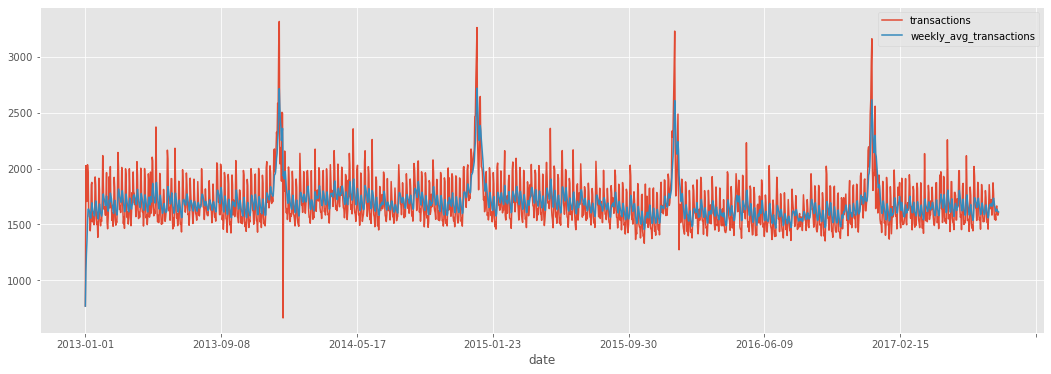

In [51]:
ventas_prom = train.groupby('date').agg({'sales': 'mean'}).reset_index()
ventas_prom['weekly_avg_sales'] = ventas_prom['sales'].ewm(span=7, adjust=False).mean()
ax1 = ventas_prom.plot(x= 'date', y= ['sales', 'weekly_avg_sales'], figsize=(18,6))
transacciones_prom = transactions.groupby('date').agg({'transactions': 'mean'}).reset_index()
transacciones_prom['weekly_avg_transactions'] = transacciones_prom['transactions'].ewm(span=7, adjust=False).mean()
ax2 = avg_transactions.plot(x= 'date', y= ['transactions', 'weekly_avg_transactions'], figsize=(18,6))

aqui se muestra la relacion de mercado con oil

# DATA CLEANING


### Vamos a juntar toda nuestra base de datos para poder realizar los cambios en una sola tabla, solo vamos a juntar lo que queremos predecir, es decir "Train"

In [52]:
train_completa = pd.merge(train,oil, on='date')
train_completa = pd.merge(train_completa,holidays_events, on='date')
train_completa = pd.merge(train_completa,stores, on='store_nbr')
train_completa = pd.merge(train_completa,transactions, on=['date','store_nbr'])
train_completa

id        date  store_nbr                      family     sales  \
0         73062  2013-02-11          1                  AUTOMOTIVE     0.000   
1         73063  2013-02-11          1                   BABY CARE     0.000   
2         73064  2013-02-11          1                      BEAUTY     0.000   
3         73065  2013-02-11          1                   BEVERAGES   172.000   
4         73066  2013-02-11          1                       BOOKS     0.000   
...         ...         ...        ...                         ...       ...   
322042  3000883  2017-08-15          9                     POULTRY   438.133   
322043  3000884  2017-08-15          9              PREPARED FOODS   154.553   
322044  3000885  2017-08-15          9                     PRODUCE  2419.729   
322045  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
322046  3000887  2017-08-15          9                     SEAFOOD    16.000   

        onpromotion  dcoilwtico   type_x    locale locale_name  \
0                 0       97.01  Holiday  National     Ecuador   
1                 0       97.01  Holiday  National     Ecuador   
2                 0       97.01  Holiday  National     Ecuador   
3                 0       97.01  Holiday  National     Ecuador   
4                 0       97.01  Holiday  National     Ecuador   
...             ...         ...      ...       ...         ...   
322042            0       47.57  Holiday     Local    Riobamba   
322043            1       47.57  Holiday     Local    Riobamba   
322044          148       47.57  Holiday     Local    Riobamba   
322045            8       47.57  Holiday     Local    Riobamba   
322046            0       47.57  Holiday     Local    Riobamba   

                  description  transferred   city      state type_y  cluster  \
0                    Carnaval        False  Quito  Pichincha      D       13   
1                    Carnaval        False  Quito  Pichincha      D       13   
2                    Carnaval        False  Quito  Pichincha      D       13   
3                    Carnaval        False  Quito  Pichincha      D       13   
4                    Carnaval        False  Quito  Pichincha      D       13   
...                       ...          ...    ...        ...    ...      ...   
322042  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322043  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322044  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322045  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322046  Fundacion de Riobamba        False  Quito  Pichincha      B        6   

        transactions  
0                396  
1                396  
2                396  
3                396  
4                396  
...              ...  
322042          2155  
322043          2155  
322044          2155  
322045          2155  
322046          2155  

[322047 rows x 17 columns]

In [53]:
#Vamos a checar la correlación de datos, asi como los histogramas

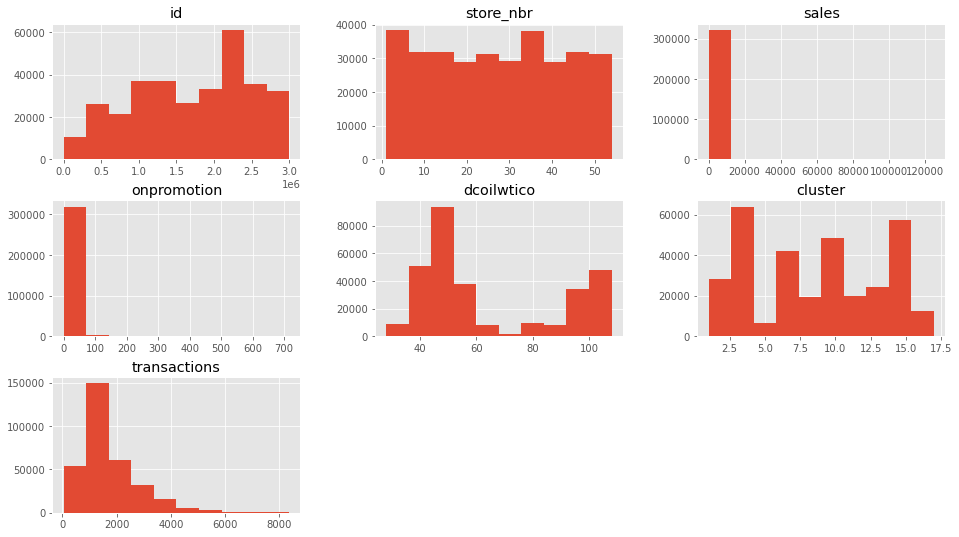

In [54]:
train_completa.hist()
plt.show()

In [55]:
sns.heatmap(train_completa.corr())

<AxesSubplot:>

## AQUI PODEMOS OBSERVAR QUE A DIFERENCIA DE ANALIZAR LAS VARIABLES POR SEPARADO, YA EXISTEN DIFERENTES CORRELACIÓNES DE DATOS CONSIDERABLES

In [57]:
train_completa.notna().all()

id               True
date             True
store_nbr        True
family           True
sales            True
onpromotion      True
dcoilwtico      False
type_x           True
locale           True
locale_name      True
description      True
transferred      True
city             True
state            True
type_y           True
cluster          True
transactions     True
dtype: bool

In [58]:
# Solo tenemos datos nullos en dco - que pertenece a oil

## ELIMINANDO NULOS

In [78]:
oil_sin_nulos = train_completa[train_completa['dcoilwtico'].notna()]

In [79]:
oil_sin_nulos

id        date  store_nbr                      family     sales  \
0         73062  2013-02-11          1                  AUTOMOTIVE     0.000   
1         73063  2013-02-11          1                   BABY CARE     0.000   
2         73064  2013-02-11          1                      BEAUTY     0.000   
3         73065  2013-02-11          1                   BEVERAGES   172.000   
4         73066  2013-02-11          1                       BOOKS     0.000   
...         ...         ...        ...                         ...       ...   
322042  3000883  2017-08-15          9                     POULTRY   438.133   
322043  3000884  2017-08-15          9              PREPARED FOODS   154.553   
322044  3000885  2017-08-15          9                     PRODUCE  2419.729   
322045  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
322046  3000887  2017-08-15          9                     SEAFOOD    16.000   

        onpromotion  dcoilwtico   type_x    locale locale_name  \
0                 0       97.01  Holiday  National     Ecuador   
1                 0       97.01  Holiday  National     Ecuador   
2                 0       97.01  Holiday  National     Ecuador   
3                 0       97.01  Holiday  National     Ecuador   
4                 0       97.01  Holiday  National     Ecuador   
...             ...         ...      ...       ...         ...   
322042            0       47.57  Holiday     Local    Riobamba   
322043            1       47.57  Holiday     Local    Riobamba   
322044          148       47.57  Holiday     Local    Riobamba   
322045            8       47.57  Holiday     Local    Riobamba   
322046            0       47.57  Holiday     Local    Riobamba   

                  description  transferred   city      state type_y  cluster  \
0                    Carnaval        False  Quito  Pichincha      D       13   
1                    Carnaval        False  Quito  Pichincha      D       13   
2                    Carnaval        False  Quito  Pichincha      D       13   
3                    Carnaval        False  Quito  Pichincha      D       13   
4                    Carnaval        False  Quito  Pichincha      D       13   
...                       ...          ...    ...        ...    ...      ...   
322042  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322043  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322044  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322045  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322046  Fundacion de Riobamba        False  Quito  Pichincha      B        6   

        transactions  
0                396  
1                396  
2                396  
3                396  
4                396  
...              ...  
322042          2155  
322043          2155  
322044          2155  
322045          2155  
322046          2155  

[300003 rows x 17 columns]

In [80]:
oil_sin_nulos.notna().all()

id              True
date            True
store_nbr       True
family          True
sales           True
onpromotion     True
dcoilwtico      True
type_x          True
locale          True
locale_name     True
description     True
transferred     True
city            True
state           True
type_y          True
cluster         True
transactions    True
dtype: bool

## SEPARAMOS LAS FECHAS DE NUESTRA BASE DE DATOS PARA AÑADIRLA A NUESTRA UNION DE DATOS

In [81]:
años = pd.DatetimeIndex(oil_sin_nulos['date']).year
meses = pd.DatetimeIndex(oil_sin_nulos['date']).month
semanas = pd.DatetimeIndex(oil_sin_nulos['date']).dayofweek

In [82]:
años.unique()

Int64Index([2013, 2014, 2015, 2016, 2017], dtype='int64', name='date')

In [83]:
meses.unique()

Int64Index([2, 4, 5, 6, 7, 8, 10, 11, 12, 3, 1, 9], dtype='int64', name='date')

In [84]:
semanas.unique()

Int64Index([0, 1, 4, 2, 3], dtype='int64', name='date')

# YA SE AGREGARON LAS COLUMNAS

In [85]:
oil_sin_nulos['year'] = años
oil_sin_nulos['month'] = meses
oil_sin_nulos['dayofweek'] = semanas
oil_sin_nulos

id        date  store_nbr                      family     sales  \
0         73062  2013-02-11          1                  AUTOMOTIVE     0.000   
1         73063  2013-02-11          1                   BABY CARE     0.000   
2         73064  2013-02-11          1                      BEAUTY     0.000   
3         73065  2013-02-11          1                   BEVERAGES   172.000   
4         73066  2013-02-11          1                       BOOKS     0.000   
...         ...         ...        ...                         ...       ...   
322042  3000883  2017-08-15          9                     POULTRY   438.133   
322043  3000884  2017-08-15          9              PREPARED FOODS   154.553   
322044  3000885  2017-08-15          9                     PRODUCE  2419.729   
322045  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
322046  3000887  2017-08-15          9                     SEAFOOD    16.000   

        onpromotion  dcoilwtico   type_x    locale locale_name  \
0                 0       97.01  Holiday  National     Ecuador   
1                 0       97.01  Holiday  National     Ecuador   
2                 0       97.01  Holiday  National     Ecuador   
3                 0       97.01  Holiday  National     Ecuador   
4                 0       97.01  Holiday  National     Ecuador   
...             ...         ...      ...       ...         ...   
322042            0       47.57  Holiday     Local    Riobamba   
322043            1       47.57  Holiday     Local    Riobamba   
322044          148       47.57  Holiday     Local    Riobamba   
322045            8       47.57  Holiday     Local    Riobamba   
322046            0       47.57  Holiday     Local    Riobamba   

                  description  transferred   city      state type_y  cluster  \
0                    Carnaval        False  Quito  Pichincha      D       13   
1                    Carnaval        False  Quito  Pichincha      D       13   
2                    Carnaval        False  Quito  Pichincha      D       13   
3                    Carnaval        False  Quito  Pichincha      D       13   
4                    Carnaval        False  Quito  Pichincha      D       13   
...                       ...          ...    ...        ...    ...      ...   
322042  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322043  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322044  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322045  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322046  Fundacion de Riobamba        False  Quito  Pichincha      B        6   

        transactions  year  month  dayofweek  
0                396  2013      2          0  
1                396  2013      2          0  
2                396  2013      2          0  
3                396  2013      2          0  
4                396  2013      2          0  
...              ...   ...    ...        ...  
322042          2155  2017      8          1  
322043          2155  2017      8          1  
322044          2155  2017      8          1  
322045          2155  2017      8          1  
322046          2155  2017      8          1  

[300003 rows x 20 columns]

In [87]:
oil_sin_nulos.notna().all()

id              True
date            True
store_nbr       True
family          True
sales           True
onpromotion     True
dcoilwtico      True
type_x          True
locale          True
locale_name     True
description     True
transferred     True
city            True
state           True
type_y          True
cluster         True
transactions    True
year            True
month           True
dayofweek       True
dtype: bool

In [88]:
oil_sin_nulos[oil_sin_nulos['dcoilwtico'].notna()]

id        date  store_nbr                      family     sales  \
0         73062  2013-02-11          1                  AUTOMOTIVE     0.000   
1         73063  2013-02-11          1                   BABY CARE     0.000   
2         73064  2013-02-11          1                      BEAUTY     0.000   
3         73065  2013-02-11          1                   BEVERAGES   172.000   
4         73066  2013-02-11          1                       BOOKS     0.000   
...         ...         ...        ...                         ...       ...   
322042  3000883  2017-08-15          9                     POULTRY   438.133   
322043  3000884  2017-08-15          9              PREPARED FOODS   154.553   
322044  3000885  2017-08-15          9                     PRODUCE  2419.729   
322045  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
322046  3000887  2017-08-15          9                     SEAFOOD    16.000   

        onpromotion  dcoilwtico   type_x    locale locale_name  \
0                 0       97.01  Holiday  National     Ecuador   
1                 0       97.01  Holiday  National     Ecuador   
2                 0       97.01  Holiday  National     Ecuador   
3                 0       97.01  Holiday  National     Ecuador   
4                 0       97.01  Holiday  National     Ecuador   
...             ...         ...      ...       ...         ...   
322042            0       47.57  Holiday     Local    Riobamba   
322043            1       47.57  Holiday     Local    Riobamba   
322044          148       47.57  Holiday     Local    Riobamba   
322045            8       47.57  Holiday     Local    Riobamba   
322046            0       47.57  Holiday     Local    Riobamba   

                  description  transferred   city      state type_y  cluster  \
0                    Carnaval        False  Quito  Pichincha      D       13   
1                    Carnaval        False  Quito  Pichincha      D       13   
2                    Carnaval        False  Quito  Pichincha      D       13   
3                    Carnaval        False  Quito  Pichincha      D       13   
4                    Carnaval        False  Quito  Pichincha      D       13   
...                       ...          ...    ...        ...    ...      ...   
322042  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322043  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322044  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322045  Fundacion de Riobamba        False  Quito  Pichincha      B        6   
322046  Fundacion de Riobamba        False  Quito  Pichincha      B        6   

        transactions  year  month  dayofweek  
0                396  2013      2          0  
1                396  2013      2          0  
2                396  2013      2          0  
3                396  2013      2          0  
4                396  2013      2          0  
...              ...   ...    ...        ...  
322042          2155  2017      8          1  
322043          2155  2017      8          1  
322044          2155  2017      8          1  
322045          2155  2017      8          1  
322046          2155  2017      8          1  

[300003 rows x 20 columns]

In [89]:
#Confirmamos que ya no hay nulos

In [92]:
# Volvemos a checar correlación

In [90]:
scipy.stats.spearmanr(oil_sin_nulos['dayofweek'], oil_sin_nulos['sales'])

SpearmanrResult(correlation=0.023967727664243415, pvalue=2.2294248306016583e-39)

In [91]:
oil_sin_nulos.corr()

id  store_nbr     sales  onpromotion  dcoilwtico  \
id            1.000000   0.013995  0.060019     0.179546   -0.836786   
store_nbr     0.013995   1.000000  0.050281     0.026417   -0.010286   
sales         0.060019   0.050281  1.000000     0.408898   -0.062568   
onpromotion   0.179546   0.026417  0.408898     1.000000   -0.133799   
dcoilwtico   -0.836786  -0.010286 -0.062568    -0.133799    1.000000   
transferred   0.147205   0.001589 -0.006916     0.030676   -0.052458   
cluster      -0.019533  -0.076238  0.033491     0.005412    0.021655   
transactions -0.021041   0.167187  0.201211     0.035085   -0.017944   
year          0.975986   0.013081  0.052147     0.173408   -0.806637   
month        -0.038735   0.000703  0.027278     0.002369   -0.013659   
dayofweek     0.143376   0.002987 -0.003209     0.073966   -0.074442   

              transferred   cluster  transactions      year     month  \
id               0.147205 -0.019533     -0.021041  0.975986 -0.038735   
store_nbr        0.001589 -0.076238      0.167187  0.013081  0.000703   
sales           -0.006916  0.033491      0.201211  0.052147  0.027278   
onpromotion      0.030676  0.005412      0.035085  0.173408  0.002369   
dcoilwtico      -0.052458  0.021655     -0.017944 -0.806637 -0.013659   
transferred      1.000000 -0.002026     -0.045724  0.149780 -0.033804   
cluster         -0.002026  1.000000      0.188730 -0.018724 -0.000726   
transactions    -0.045724  0.188730      1.000000 -0.057582  0.163922   
year             0.149780 -0.018724     -0.057582  1.000000 -0.254547   
month           -0.033804 -0.000726      0.163922 -0.254547  1.000000   
dayofweek       -0.015476 -0.001378     -0.011761  0.125179  0.062657   

              dayofweek  
id             0.143376  
store_nbr      0.002987  
sales         -0.003209  
onpromotion    0.073966  
dcoilwtico    -0.074442  
transferred   -0.015476  
cluster       -0.001378  
transactions  -0.011761  
year           0.125179  
month          0.062657  
dayofweek      1.000000

# STATISTIC ANALYSIS

##  GRÁFICAMOS EN BASE A LAS FAMILIAS Y VARIABLES QUE NOS LLAMO LA ATENCIÓN

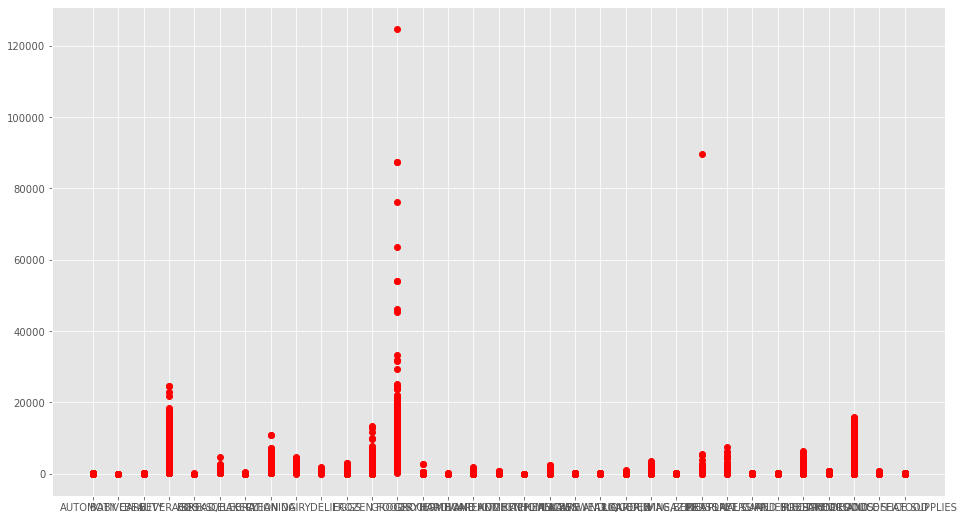

In [93]:
plt.plot(oil_sin_nulos['family'],oil_sin_nulos['sales'],'ro')

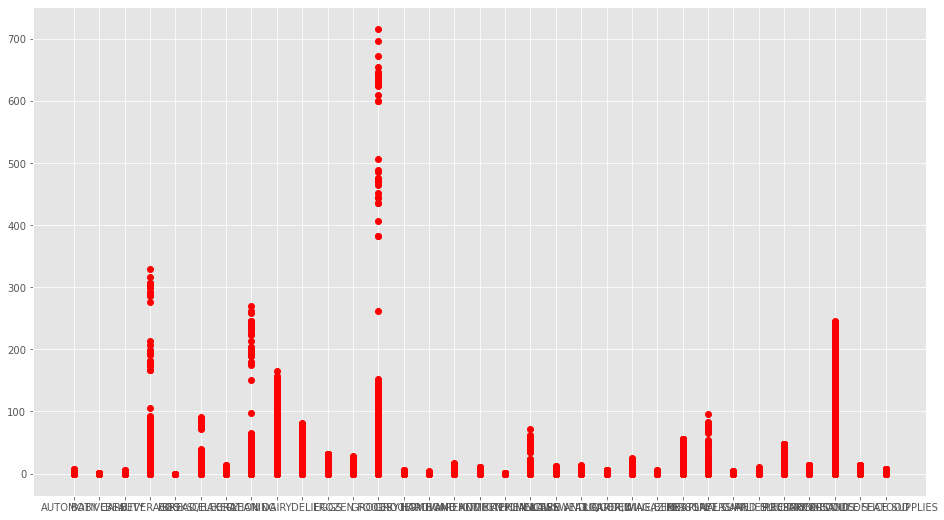

In [94]:
plt.plot(oil_sin_nulos['family'],oil_sin_nulos['onpromotion'],'ro')

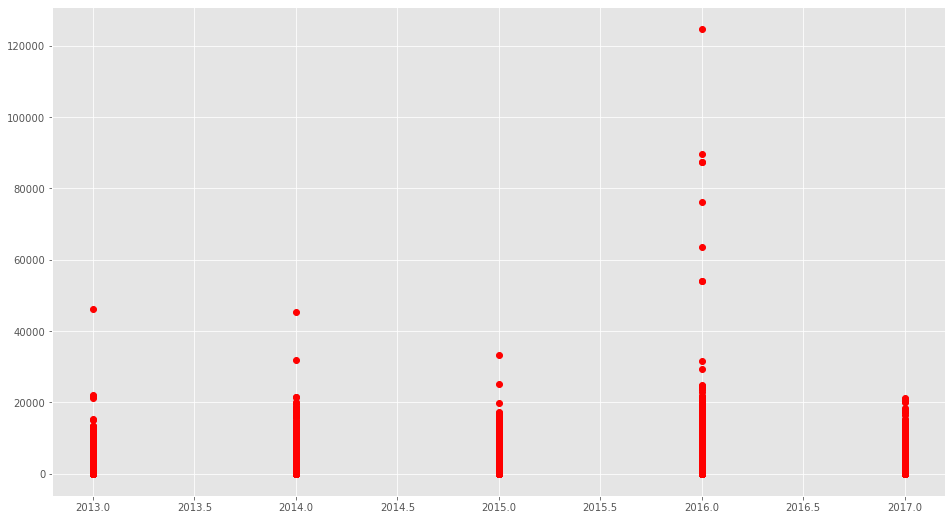

In [98]:
plt.plot(oil_sin_nulos['year'],oil_sin_nulos['sales'],'ro')

In [97]:
plt.plot(oil_sin_nulos['month'],oil_sin_nulos['sales'],'ro')

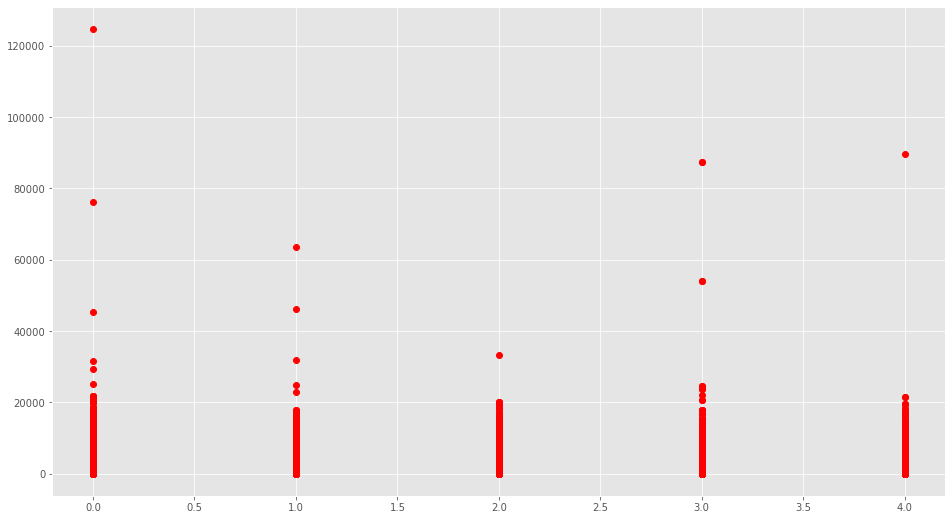

In [101]:
plt.plot(oil_sin_nulos['dayofweek'],oil_sin_nulos['sales'],'ro')

# PRE - MODELING WORK

In [104]:
#VAMOS A REALIZAR UNA TABLA QUE SOLO TRAIGA LAS VENTAS POR TIENDA

In [113]:
venta_por_tiendas = pd.read_csv("train.csv",
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
venta_por_tiendas['date'] = venta_por_tiendas.date.dt.to_period('D')
venta_por_tiendas = venta_por_tiendas.set_index(['store_nbr', 'family', 'date']).sort_index()

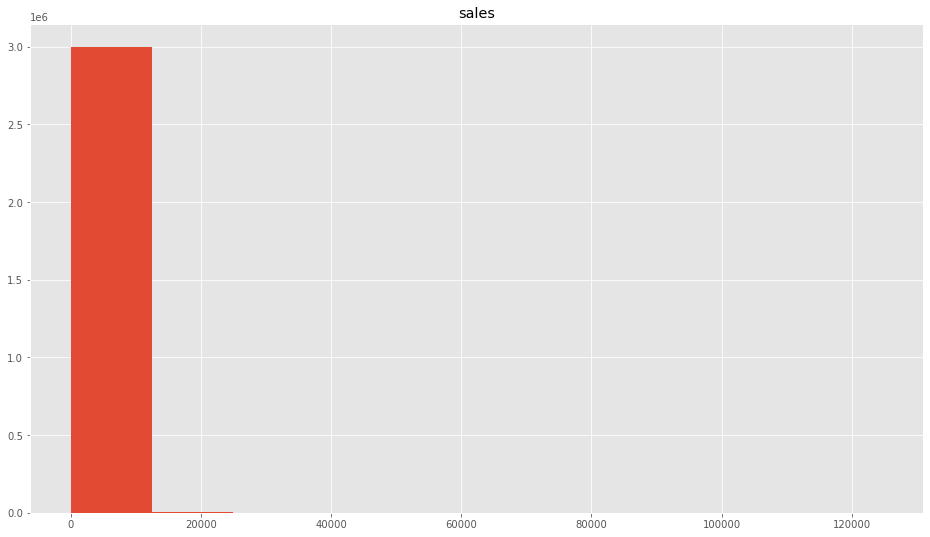

In [122]:
venta_por_tiendas.hist()
plt.show()

In [114]:
venta_por_tiendas

sales
store_nbr family     date                 
1         AUTOMOTIVE 2013-01-01   0.000000
                     2013-01-02   2.000000
                     2013-01-03   3.000000
                     2013-01-04   3.000000
                     2013-01-05   5.000000
...                                    ...
9         SEAFOOD    2017-08-11  23.830999
                     2017-08-12  16.859001
                     2017-08-13  20.000000
                     2017-08-14  17.000000
                     2017-08-15  16.000000

[3000888 rows x 1 columns]

In [116]:
y = venta_por_tiendas.unstack(['store_nbr', 'family']).loc["2017"]
y

sales                                                \
store_nbr           1                                                 
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2017-01-01        0.0       0.0    0.0       0.0   0.0     0.000000   
2017-01-02        5.0       0.0    0.0    1434.0   0.0   166.819000   
2017-01-03        4.0       0.0    4.0    3081.0   2.0   519.348022   
2017-01-04        1.0       0.0    4.0    3039.0   2.0   543.250977   
2017-01-05        2.0       0.0    3.0    2617.0   0.0   533.479980   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0   145.606995   
2017-08-12        6.0       0.0    3.0    1659.0   0.0   243.220001   
2017-08-13        1.0       0.0    1.0     803.0   0.0   136.679001   
2017-08-14        1.0       0.0    6.0    2201.0   0.0   346.037994   
2017-08-15        4.0       0.0    4.0    1942.0   0.0   329.541016   

                                                     ...            \
store_nbr                                            ...         9   
family     CELEBRATION CLEANING   DAIRY        DELI  ... MAGAZINES   
date                                                 ...             
2017-01-01         0.0      0.0     0.0    0.000000  ...       0.0   
2017-01-02         0.0    332.0   376.0   44.980000  ...       5.0   
2017-01-03        15.0    952.0  1045.0  209.300003  ...       2.0   
2017-01-04        17.0   1055.0  1029.0  135.944000  ...       3.0   
2017-01-05        40.0    918.0   853.0  137.005997  ...       2.0   
...                ...      ...     ...         ...  ...       ...   
2017-08-11         4.0    341.0   343.0   64.302002  ...       5.0   
2017-08-12         3.0    351.0   526.0   99.487999  ...       2.0   
2017-08-13         1.0    169.0   266.0   47.770000  ...       3.0   
2017-08-14         4.0    571.0   699.0  154.578003  ...      12.0   
2017-08-15        21.0    703.0   602.0  116.402000  ...      11.0   

                                                                           \
store_nbr                                                                   
family           MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2017-01-01    0.000000           0.0          0.0                     0.0   
2017-01-02  659.570007        1243.0         11.0                    41.0   
2017-01-03  547.364014         876.0          6.0                    15.0   
2017-01-04  395.287994         677.0          6.0                    13.0   
2017-01-05  470.768005         604.0          7.0                    10.0   
...                ...           ...          ...                     ...   
2017-08-11  309.244995         373.0         11.0                     2.0   
2017-08-12  260.298004         400.0          7.0                    10.0   
2017-08-13  327.205994         510.0          2.0                     9.0   
2017-08-14  330.975006         445.0          2.0                    14.0   
2017-08-15  449.227997         522.0          6.0                     6.0   

                                                                               \
store_nbr                                                                       
family         POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                            
2017-01-01    0.000000       0.000000     0.000000                        0.0   
2017-01-02  843.596008     115.188995  3136.895996                        1.0   
2017-01-03  714.659973     133.039001  3229.558105                        1.0   
2017-01-04  536.830017      75.201004  1491.416992                        7.0   
2017-01-05  414.100006     113.698997  1566.821045                        1.0   
...           

In [123]:
#NO VIMOS NECESARIO REALIZAR ALGUN OTRO CAMBIO

# FEATURE ENGINEERING

SEPARANDO NUESTRA INFO PARA HACER UN SET DE TRAINING DATA

In [125]:
fourier = CalendarFourier(freq='M', order=4)
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()
X['NewYear'] = (X.index.dayofyear == 1)

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)

In [128]:
X

const  trend  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
date                                                                       
2017-01-01    1.0    1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-01-02    1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2017-01-03    1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   
2017-01-04    1.0    4.0     0.0     0.0     1.0     0.0     0.0     0.0   
2017-01-05    1.0    5.0     0.0     0.0     0.0     1.0     0.0     0.0   
...           ...    ...     ...     ...     ...     ...     ...     ...   
2017-08-11    1.0  223.0     0.0     0.0     0.0     0.0     1.0     0.0   
2017-08-12    1.0  224.0     0.0     0.0     0.0     0.0     0.0     1.0   
2017-08-13    1.0  225.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-08-14    1.0  226.0     1.0     0.0     0.0     0.0     0.0     0.0   
2017-08-15    1.0  227.0     0.0     1.0     0.0     0.0     0.0     0.0   

            sin(1,freq=M)  cos(1,freq=M)  sin(2,freq=M)  cos(2,freq=M)  \
date                                                                     
2017-01-01       0.000000       1.000000       0.000000       1.000000   
2017-01-02       0.201299       0.979530       0.394356       0.918958   
2017-01-03       0.394356       0.918958       0.724793       0.688967   
2017-01-04       0.571268       0.820763       0.937752       0.347305   
2017-01-05       0.724793       0.688967       0.998717      -0.050649   
...                   ...            ...            ...            ...   
2017-08-11       0.897805      -0.440394      -0.790776      -0.612106   
2017-08-12       0.790776      -0.612106      -0.968077      -0.250653   
2017-08-13       0.651372      -0.758758      -0.988468       0.151428   
2017-08-14       0.485302      -0.874347      -0.848644       0.528964   
2017-08-15       0.299363      -0.954139      -0.571268       0.820763   

            sin(3,freq=M)  cos(3,freq=M)  sin(4,freq=M)  cos(4,freq=M)  \
date                                                                     
2017-01-01       0.000000       1.000000       0.000000       1.000000   
2017-01-02       0.571268       0.820763       0.724793       0.688967   
2017-01-03       0.937752       0.347305       0.998717      -0.050649   
2017-01-04       0.968077      -0.250653       0.651372      -0.758758   
2017-01-05       0.651372      -0.758758      -0.101168      -0.994869   
...                   ...            ...            ...            ...   
2017-08-11      -0.201299       0.979530       0.968077      -0.250653   
2017-08-12       0.394356       0.918958       0.485302      -0.874347   
2017-08-13       0.848644       0.528964      -0.299363      -0.954139   
2017-08-14       0.998717      -0.050649      -0.897805      -0.440394   
2017-08-15       0.790776      -0.612106      -0.937752       0.347305   

            NewYear  
date                 
2017-01-01     True  
2017-01-02    False  
2017-01-03    False  
2017-01-04    False  
2017-01-05    False  
...             ...  
2017-08-11    False  
2017-08-12    False  
2017-08-13    False  
2017-08-14    False  
2017-08-15    False  

[227 rows x 17 columns]

In [131]:
y_pred

sales                                                      \
store_nbr              1                                                       
family        AUTOMOTIVE BABY CARE        BEAUTY     BEVERAGES         BOOKS   
date                                                                           
2017-01-01  2.131628e-14       0.0  2.708944e-14 -2.273737e-13  1.887379e-15   
2017-01-02  4.158065e+00       0.0  3.693728e+00  2.438526e+03  6.524888e-01   
2017-01-03  4.019103e+00       0.0  3.790063e+00  2.556636e+03  9.822520e-01   
2017-01-04  4.086815e+00       0.0  3.626226e+00  2.722500e+03  1.070364e+00   
2017-01-05  3.927327e+00       0.0  3.109574e+00  2.342817e+03  7.886527e-01   
...                  ...       ...           ...           ...           ...   
2017-08-11  6.230058e+00       0.0  3.591173e+00  2.269718e+03  4.256072e-01   
2017-08-12  5.340005e+00       0.0  4.242347e+00  2.405677e+03  1.871334e-01   
2017-08-13  2.504829e+00       0.0  2.057165e+00  9.579716e+02  1.501821e-01   
2017-08-14  4.341639e+00       0.0  3.520897e+00  2.143798e+03  1.150321e-01   
2017-08-15  4.103242e+00       0.0  3.616961e+00  2.226185e+03  3.954261e-01   

                                                                    \
store_nbr                                                            
family      BREAD/BAKERY   CELEBRATION      CLEANING         DAIRY   
date                                                                 
2017-01-01 -2.273737e-13  5.373479e-14  5.684342e-13  2.387424e-12   
2017-01-02  4.339072e+02  1.278250e+01  7.314578e+02  8.363691e+02   
2017-01-03  4.272647e+02  1.496032e+01  8.624653e+02  8.416939e+02   
2017-01-04  5.002280e+02  1.550328e+01  9.660105e+02  9.806785e+02   
2017-01-05  4.429722e+02  1.901495e+01  7.928288e+02  8.212025e+02   
...                  ...           ...           ...           ...   
2017-08-11  3.488156e+02  2.282886e+01  6.902050e+02  7.470656e+02   
2017-08-12  3.654437e+02  1.544650e+01  5.847289e+02  7.504708e+02   
2017-08-13  1.145495e+02  5.118466e+00  1.798311e+02  2.828302e+02   
2017-08-14  3.328502e+02  1.479510e+01  5.816891e+02  6.666268e+02   
2017-08-15  3.203635e+02  1.671835e+01  7.092581e+02  6.688751e+02   

                          ...                                            \
store_nbr                 ...             9                               
family              DELI  ...     MAGAZINES         MEATS PERSONAL CARE   
date                      ...                                             
2017-01-01  3.268497e-13  ...  3.108624e-14  1.023182e-12 -1.023182e-12   
2017-01-02  1.590167e+02  ...  3.372874e+00  5.205468e+02  8.060135e+02   
2017-01-03  1.538898e+02  ...  2.618076e+00  4.814580e+02  7.538661e+02   
2017-01-04  1.578011e+02  ...  2.058240e+00  4.258345e+02  6.297048e+02   
2017-01-05  1.313682e+02  ...  1.693960e+00  5.888703e+02  5.486101e+02   
...                  ...  ...           ...           ...           ...   
2017-08-11  1.628032e+02  ...  4.955111e+00  2.546313e+02  2.722978e+02   
2017-08-12  1.355374e+02  ...  5.832216e+00  3.651247e+02  5.354481e+02   
2017-08-13  5.376774e+01  ...  6.674256e+00  3.838337e+02  5.540330e+02   
2017-08-14  1.327222e+02  ...  4.494424e+00  3.158731e+02  3.726632e+02   
2017-08-15  1.313436e+02  ...  3.905065e+00  3.131967e+02  3.593403e+02   

                                                                              \
store_nbr                                                                      
family     PET SUPPLIES PLAYERS AND ELECTRONICS       POULTRY PREPARED FOODS   
date                                                                           
2017-01-01     0.000000            2.842171e-14  1.023182e-12   2.273737e-13   
2017-01-02     9.774855            1.951512e+01  5.960566e+02   1.351610e+02   
2017-01-03     8.359401            1.800615e+01  5.495394e+02   1.304207e+02   
2017-01-04     8.577979            1.546256e+01  4.735746e+02   1.162081e+02   
2

In [133]:
### YA TENEMOS NUESTRO SET PARA PREDECIR A PARTIR DE venta_por_tiendas

In [129]:
model

LinearRegression(fit_intercept=False)

# PRE - MODELING

# GRÁFICAS POR TIENDA

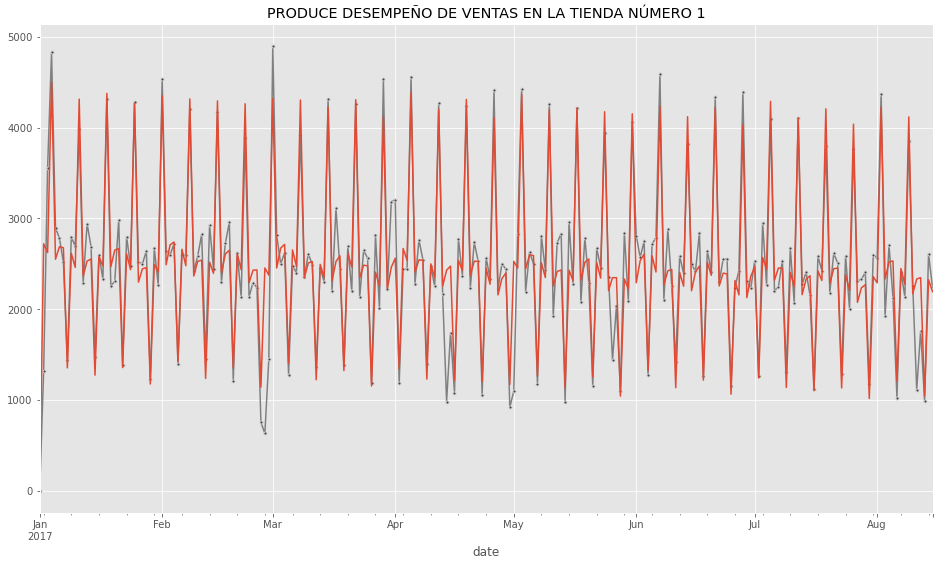

In [150]:
NUMERO_DE_TIENDA = '1'  # 1 - 54 DE LA CANTIDAD DE TIENDAS QUE HAY EN TOTAL
FAMILY = 'PRODUCE'

plot_params = dict(
    color = '0.5',
    style = ".-",
    markeredgecolor="0.8",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} DESEMPEÑO DE VENTAS EN LA TIENDA NÚMERO {NUMERO_DE_TIENDA}');

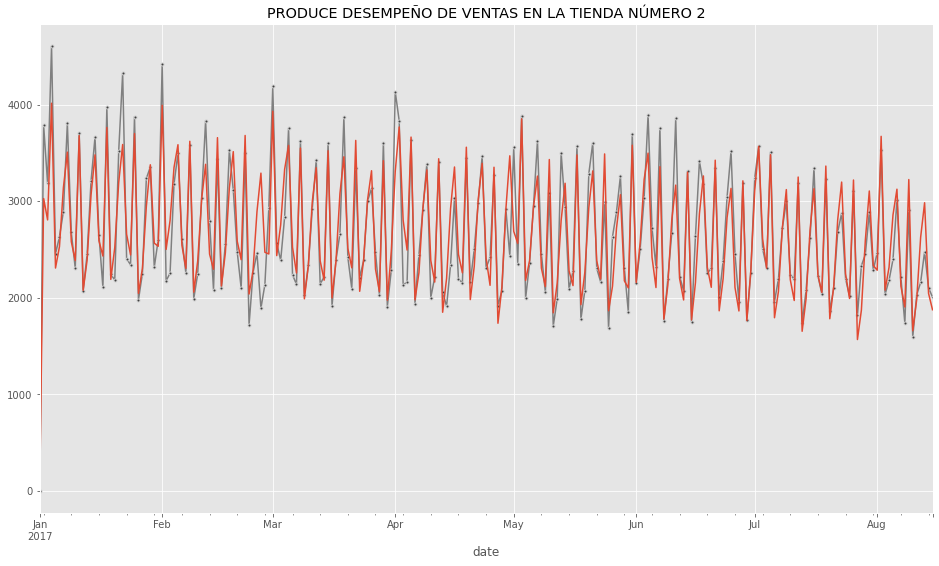

In [153]:
NUMERO_DE_TIENDA = '2'  # 1 - 54 DE LA CANTIDAD DE TIENDAS QUE HAY EN TOTAL
FAMILY = 'PRODUCE'

plot_params = dict(
    color = '0.5',
    style = ".-",
    markeredgecolor="0.8",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} DESEMPEÑO DE VENTAS EN LA TIENDA NÚMERO {NUMERO_DE_TIENDA}');

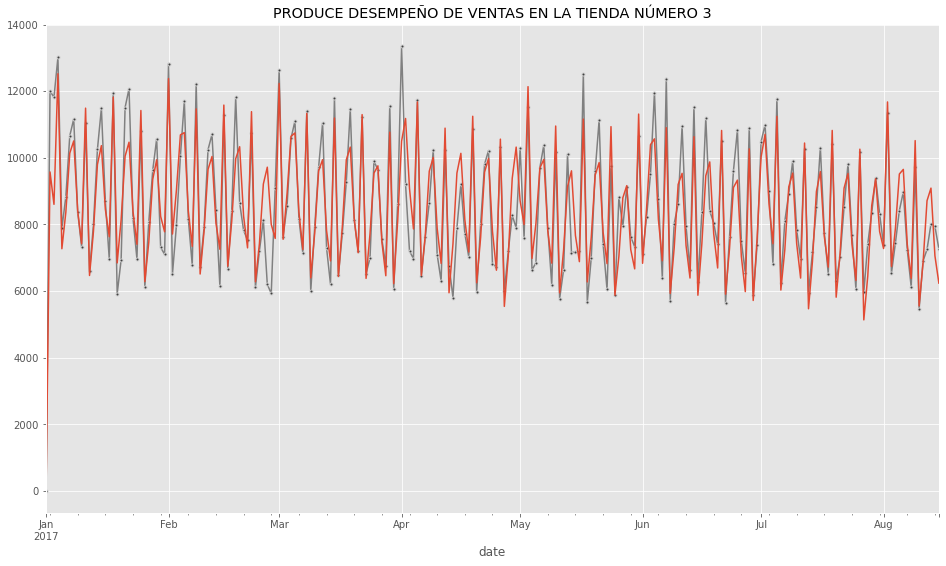

In [154]:
NUMERO_DE_TIENDA = '3'  # 1 - 54 DE LA CANTIDAD DE TIENDAS QUE HAY EN TOTAL
FAMILY = 'PRODUCE'

plot_params = dict(
    color = '0.5',
    style = ".-",
    markeredgecolor="0.8",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} DESEMPEÑO DE VENTAS EN LA TIENDA NÚMERO {NUMERO_DE_TIENDA}');

In [155]:
NUMERO_DE_TIENDA = '4'  # 1 - 54 DE LA CANTIDAD DE TIENDAS QUE HAY EN TOTAL
FAMILY = 'PRODUCE'

plot_params = dict(
    color = '0.5',
    style = ".-",
    markeredgecolor="0.8",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} DESEMPEÑO DE VENTAS EN LA TIENDA NÚMERO {NUMERO_DE_TIENDA}');

In [156]:
NUMERO_DE_TIENDA = '5'  # 1 - 54 DE LA CANTIDAD DE TIENDAS QUE HAY EN TOTAL
FAMILY = 'PRODUCE'

plot_params = dict(
    color = '0.5',
    style = ".-",
    markeredgecolor="0.8",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} DESEMPEÑO DE VENTAS EN LA TIENDA NÚMERO {NUMERO_DE_TIENDA}');

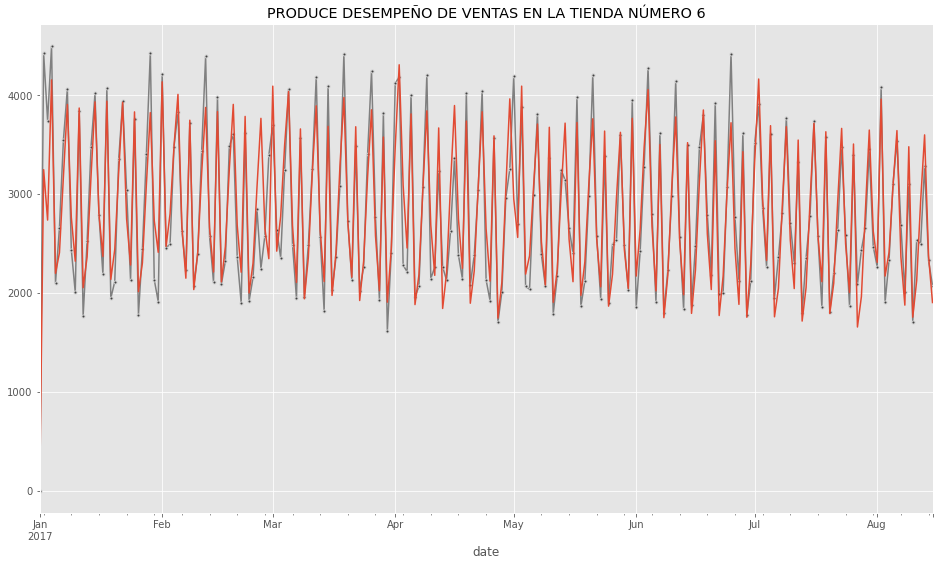

In [157]:
NUMERO_DE_TIENDA = '6'  # 1 - 54 DE LA CANTIDAD DE TIENDAS QUE HAY EN TOTAL
FAMILY = 'PRODUCE'

plot_params = dict(
    color = '0.5',
    style = ".-",
    markeredgecolor="0.8",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} DESEMPEÑO DE VENTAS EN LA TIENDA NÚMERO {NUMERO_DE_TIENDA}');

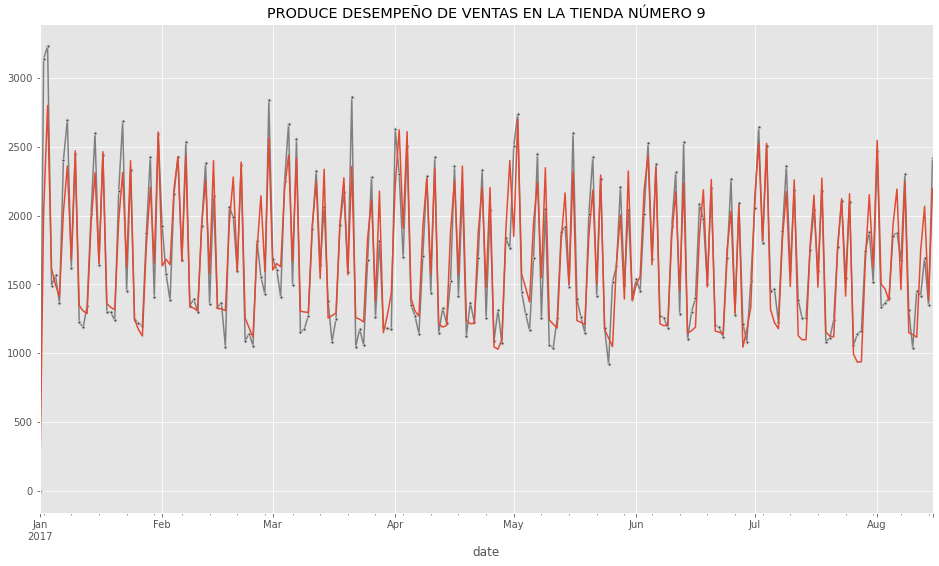

In [158]:
NUMERO_DE_TIENDA = '9'  # 1 - 54 DE LA CANTIDAD DE TIENDAS QUE HAY EN TOTAL
FAMILY = 'PRODUCE'

plot_params = dict(
    color = '0.5',
    style = ".-",
    markeredgecolor="0.8",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', NUMERO_DE_TIENDA, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} DESEMPEÑO DE VENTAS EN LA TIENDA NÚMERO {NUMERO_DE_TIENDA}');

# COMO PODEMOS OBSERVAR, ESTE MODELO SIGUE GRÁFICAMENTE LAS VENTAS POR EL NÚMERO DE TIENDA DE LA FAMILIA, EN ESTE CASO NOS CONCENTRAMOS EN PRODUCE

# MODELING

In [165]:
TEST_DATAFRAME = pd.read_csv('test.csv',
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
TEST_DATAFRAME['date'] = TEST_DATAFRAME.date.dt.to_period('D')
TEST_DATAFRAME = TEST_DATAFRAME.set_index(['store_nbr', 'family', 'date']).sort_index()

X_test = dp.out_of_sample(steps=16)
X_test.index.name = 'date'
X_test['NewYear'] = (X_test.index.dayofyear == 1)


y_submit = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
y_submit = y_submit.stack(['store_nbr', 'family'])
y_submit = y_submit.join(TEST_DATAFRAME.id).reindex(columns=['id', 'sales'])

In [163]:
TEST_DATAFRAME

id  onpromotion
store_nbr family     date                            
1         AUTOMOTIVE 2017-08-16  3000888            0
                     2017-08-17  3002670            0
                     2017-08-18  3004452            0
                     2017-08-19  3006234            0
                     2017-08-20  3008016            0
...                                  ...          ...
9         SEAFOOD    2017-08-27  3022271            0
                     2017-08-28  3024053            0
                     2017-08-29  3025835            0
                     2017-08-30  3027617            0
                     2017-08-31  3029399            0

[28512 rows x 2 columns]

# RESULTS

In [166]:
y_submit.to_csv('submission_ciencia_datos.csv', index=False)